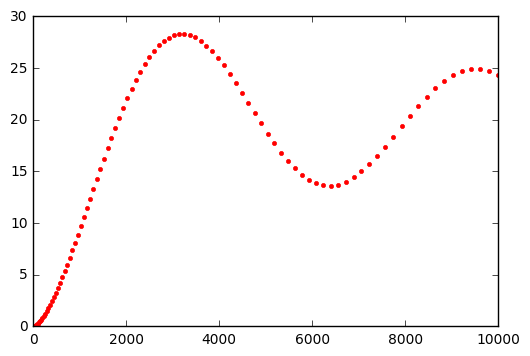

In [133]:
import numpy as np
import tensorflow as tf
import tflearn
import keras
import matplotlib.pyplot as plt

%matplotlib inline

t = np.linspace(0, 100, 101)
x1 = np.power(t,2)
x2 = np.random.randn(len(t)) 
y = np.sin( x1 / 1000 )

y = np.array([np.sum(y[0:i]) for i in range(len(y))])

trainX = np.stack((x1, x2), axis = 1)
trainY = y
plt.plot(x1, y, 'r.')
#plt.plot(x1, y2, 'b.')

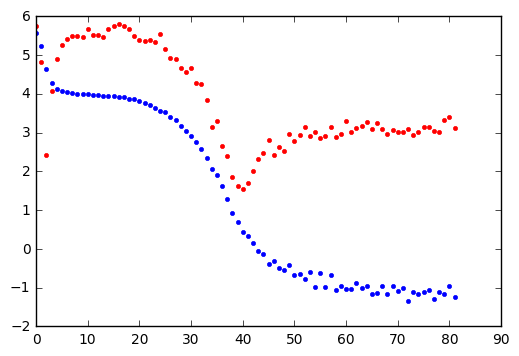

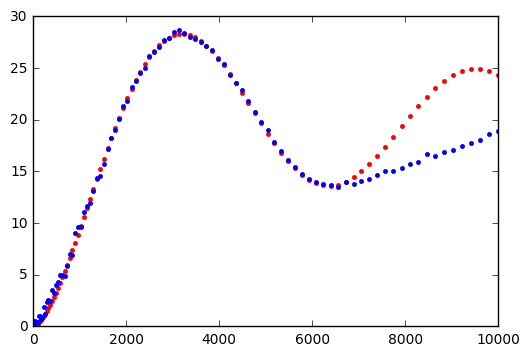

In [139]:
from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn import preprocessing
from sklearn.utils import shuffle
#trainX, trainY = shuffle(trainX, trainY , random_state=0)

model = Sequential([
    Dense(120, input_dim=2, init='normal'),
    Activation('relu'),
    #Dense(200, init='normal'),
    #Activation('relu'),
    Dense(50, init='normal'),
    Activation('relu'),
    Dense(1),
])

model.compile(loss='mean_squared_error', optimizer='rmsprop')

scaler = preprocessing.StandardScaler().fit( trainX )
trainXscaled = scaler.transform(trainX)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=40, verbose=0, mode='auto')

hist = model.fit(trainXscaled, trainY, nb_epoch=200, batch_size=1, verbose = 0, validation_split=0.2, shuffle=True, callbacks=[early_stop])

plt.plot(np.log(hist.history['loss']), 'b.')
plt.plot(np.log(hist.history['val_loss']), 'r.')
plt.show()

predY = model.predict(trainXscaled)
plt.plot(x1, y, 'r.')
plt.plot(trainX[:,0], predY, 'b.')

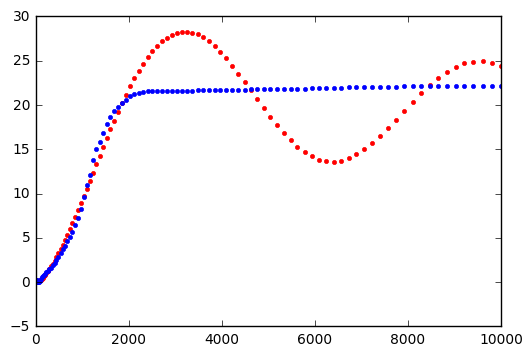

In [156]:
predY = model.predict(lstmTrainX)
plt.plot(x1, y, 'r.')
plt.plot(trainX[:,0], predY, 'b.')